In [195]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
pd.set_option('display.max_rows', None)

In [114]:
def write_yaml_file(file, data):
    with open(file, "w") as f:
        f.writelines(x + '\n' for x in data)

In [126]:
def load_pkl_dict(filename, folder):
    with open(folder + filename, "rb") as f:
        loaded_file = pickle.load(f)
        df = pd.DataFrame.from_dict(loaded_file, orient='columns')
        return df

In [248]:
def ranking_scores(alphas, norms, neg_fix, input_cluster, feature_cluster, types):
    folder = "../../experiment_data/results/"
    dfs = []
    for t in types:
        for alpha in alphas:
            for norm in norms:
                for fix in neg_fix:
                    for ic in input_cluster:
                        for fc in feature_cluster:
                            df = load_pkl_dict(f"oscr_data_{t}_{ic}_{fc}_{alpha}_{fix}_{norm}.pkl", folder)
                            df['TYPE'] = t
                            df['ALPHA'] = alpha
                            df['NORM'] = norm
                            df['NEGATIVE_FIX'] = fix
                            df['INPUT-CLUSTER'] = ic
                            df['FEATURE-CLUSTER'] = fc
                            df['GAMMA+'] = df['GAMMA'].apply(lambda x: x[1])
                            df['GAMMA-'] = df['GAMMA'].apply(lambda x: x[2])
                            df['GAMMA_TOTAL'] = df['GAMMA'].apply(lambda x: x[0])
                            df['EPSILON_TOTAL'] = df['EPSILON'].apply(lambda x: x[0])
                            df['CCR'] = df['CCR-FPR'].apply(lambda x: x[0])
                            df['FPR'] = df['CCR-FPR'].apply(lambda x: x[1])
                            
                    dfs.append(df)
    df_final = pd.concat(dfs)
    return df_final

In [255]:
alphas = [-1, 3, 5, 7, 10]
norms = ["NONE", "WEIGHTS", "N-CLASSES", "NORM-WEIGHTS"]
neg_fixes = ["ORIGINAL", "NEGATIVE_VALUE", "VALUE_SHIFT"]
types = ["base", "input-cluster", "validation-features-cluster", "training-features-cluster", "input-validation-features-cluster", "input-validation-features-cluster"]
input_cluster = [1]
feature_cluster = [1]
df = ranking_scores(alphas, norms, neg_fixes, input_cluster, feature_cluster, types[:1])

In [271]:
df_mod = df[df['NORM'] != 'NORM-WEIGHTS']
df_mod = df_mod.drop_duplicates(subset=['ALPHA', 'NORM', 'NEGATIVE_FIX', 'GAMMA'], keep='first')
df_mod = df_mod[df_mod['ALPHA'] == -1]


top_gamma = df_mod.nlargest(15, 'GAMMA_TOTAL')
top_eps = df_mod.nlargest(15, 'EPSILON_TOTAL')

print_list = [ 'ALPHA', 'NORM', 'NEGATIVE_FIX', 'GAMMA_TOTAL', 'EPSILON_TOTAL', 'EPSILON' ]
print(top_gamma[print_list])
print(top_eps[print_list])

           ALPHA       NORM    NEGATIVE_FIX  GAMMA_TOTAL  EPSILON_TOTAL  \
6000-1.3      -1  N-CLASSES  NEGATIVE_VALUE     0.825017         3.7674   
6000-1.2      -1  N-CLASSES  NEGATIVE_VALUE     0.825003         4.3516   
4900-1.1      -1  N-CLASSES  NEGATIVE_VALUE     0.824674         3.7562   
4800-1.1      -1  N-CLASSES  NEGATIVE_VALUE     0.824624         3.7568   
4700-1.1      -1  N-CLASSES  NEGATIVE_VALUE     0.824521         4.3355   
4500-1.05     -1  N-CLASSES  NEGATIVE_VALUE     0.824408         3.7528   
4600-1.05     -1  N-CLASSES  NEGATIVE_VALUE     0.824393         3.7523   
4400-1.05     -1  N-CLASSES  NEGATIVE_VALUE     0.824369         4.3322   
4600-1.1      -1  N-CLASSES  NEGATIVE_VALUE     0.824364         3.7585   
4700-1.05     -1  N-CLASSES  NEGATIVE_VALUE     0.824327         3.7522   
4300-1.05     -1  N-CLASSES  NEGATIVE_VALUE     0.824270         3.7535   
4800-1.05     -1  N-CLASSES  NEGATIVE_VALUE     0.824213         4.3417   
4500-1.1      -1  N-CLASS

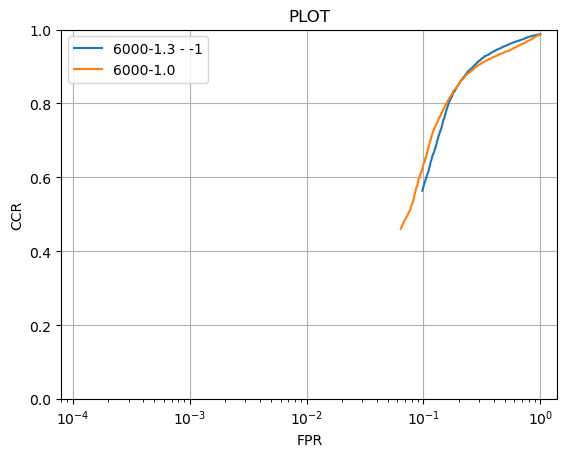

In [274]:
fig, axs = plt.subplots(1,1)

axs.title.set_text(f"PLOT")
axs.set_xlabel('FPR')
axs.set_ylabel('CCR')
axs.grid()
axs.set_xscale('log')
# axs[row][col].set_xlim([0, 1])  # sets the x-axis limits
axs.set_ylim([0, 1]) # sets the y-axis limits
axs.set_xlim(8 * 1e-5, 1.4)

for index, row in top_gamma.head(1).iterrows():
    axs.plot(row['FPR'], row['CCR'], label=f"{index} - {row['ALPHA']}")
    
for index, row in top_eps.head(1).iterrows():
    axs.plot(row['FPR'], row['CCR'], label=f"{index}")

    
axs.legend(loc="upper left")   
plt.show()

In [217]:
for index, row in top_gamma.head(2).iterrows():
   print(f"Index: {index}, CCR: {row['CCR']}, FPR: {row['FPR']}")

Index: 6000-1.3, CCR: [0.9727 0.9727 0.9727 ... 0.5658 0.5545 0.5318], FPR: [1.         0.99988636 0.99977273 ... 0.09590909 0.09340909 0.08840909]
Index: 6000-1.05, CCR: [0.9655 0.9655 0.9655 ... 0.6037 0.5937 0.5733], FPR: [1.         0.99988636 0.99977273 ... 0.10125    0.09875    0.09420455]
